# Import and write helper functions

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.io import mminfo,mmread
import scanpy as sc
import matplotlib
import matplotlib.font_manager
import itertools as it
from adjustText import adjust_text

ModuleNotFoundError: No module named 'adjustText'

In [2]:
def init_grid(grid_dimensions: tuple, fig_dimensions: tuple, caption_height: int = 0, **kwargs) -> tuple:
    """ Initializes a grid of figures of correct dimension.

    To use this, please call plt.subplot(*grid_dimensions, next(counter)) before each figure to
    include in the grid

    Args:
        grid_dimensions: The dimension of grid (num rows, num columns)
        fig_dimensions: The dimension of each figure in the grid (width, height)
        caption_height: The height of the caption
        **kwargs: Additional arguments to pass to plt.figure

    Returns:
        tuple of (grid_dimensions, fig_dimensions, counter)

    """
    counter = it.count(1)
    plt.figure(figsize=(grid_dimensions[1] * fig_dimensions[0],
                        grid_dimensions[0] * fig_dimensions[1] + caption_height), **kwargs)
    return grid_dimensions, fig_dimensions, counter

# Read in the data

In [3]:
# Mean of z-normalized single cells
mean_norm = sc.read_h5ad("data/K562_gwps_normalized_bulk_01.h5ad")
mean_norm_df = mean_norm.to_df()

In [4]:
# Raw single cell pseudobulk data
mean_raw = sc.read_h5ad("data/K562_gwps_raw_bulk_01.h5ad")

# Try to do UMAP on the pseudobulk

## Enrich for highly variable genes and highly variable cells

In [5]:
# Normalize the data
mean_raw.var['mt'] = mean_raw.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(mean_raw, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sc.pp.normalize_total(mean_raw, target_sum=1e4)
sc.pp.log1p(mean_raw)

sc.pp.regress_out(mean_raw, ['total_counts', 'pct_counts_mt'])

/home/briando/data/software/miniconda3/envs/scrnaseq/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/briando/data/software/miniconda3/envs/scrnaseq/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [8]:
mean_raw.obs.head()

,UMI_count_unfiltered,num_cells_unfiltered,num_cells_filtered,control_expr,fold_expr,pct_expr,core_control,mean_leverage_score,std_leverage_score,energy_test_p_value,anderson_darling_counts,mann_whitney_counts,z_gemgroup_UMI,mitopercent,TE_ratio,cnv_score_z,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
gene_transcript,,,,,,,,,,,,,,,,,,,,
0_A1BG_P1_ENSG00000121410,11648.256836,246,237.0,0.171285,0.023274,-0.976726,False,0.264768,1.137824,0.017798,3,4,0.088383,0.118743,0.013627,NaN,8248,12027.467773,0.0,0.0
10000_ZBTB46_P1P2_ENSG00000130584,12291.757812,95,89.0,0.026212,0.000000,-1.000000,False,0.260951,1.095702,0.130587,1,1,0.339968,0.116354,0.014563,7.305249,8248,13062.381836,0.0,0.0
10001_ZBTB47_P1P2_ENSG00000114853,11295.581055,318,308.0,0.048150,0.527716,-0.472284,False,0.277062,1.115502,0.457854,0,0,0.044135,0.118609,0.014196,0.014276,8248,11621.152344,0.0,0.0
10002_ZBTB48_P1P2_ENSG00000204859,12323.345703,84,83.0,0.134619,0.163264,-0.836736,False,0.370545,1.089380,0.352665,3,3,0.241949,0.115377,0.013690,0.881662,8247,12465.313477,0.0,0.0
10003_ZBTB49_P1P2_ENSG00000168826,11520.527344,290,276.0,0.026936,0.127473,-0.872527,False,0.301086,1.099432,0.217678,1,1,0.135962,0.119273,0.014122,1.277506,8248,11995.145508,0.0,0.0


In [9]:
mean_raw.obs["gene"] = [x.split('_')[1] for x in mean_raw.obs.index]
mean_raw.obs.head()

,UMI_count_unfiltered,num_cells_unfiltered,num_cells_filtered,control_expr,fold_expr,pct_expr,core_control,mean_leverage_score,std_leverage_score,energy_test_p_value,...,mann_whitney_counts,z_gemgroup_UMI,mitopercent,TE_ratio,cnv_score_z,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,gene
gene_transcript,,,,,,,,,,,,,,,,,,,,,
0_A1BG_P1_ENSG00000121410,11648.256836,246,237.0,0.171285,0.023274,-0.976726,False,0.264768,1.137824,0.017798,...,4,0.088383,0.118743,0.013627,NaN,8248,12027.467773,0.0,0.0,A1BG
10000_ZBTB46_P1P2_ENSG00000130584,12291.757812,95,89.0,0.026212,0.000000,-1.000000,False,0.260951,1.095702,0.130587,...,1,0.339968,0.116354,0.014563,7.305249,8248,13062.381836,0.0,0.0,ZBTB46
10001_ZBTB47_P1P2_ENSG00000114853,11295.581055,318,308.0,0.048150,0.527716,-0.472284,False,0.277062,1.115502,0.457854,...,0,0.044135,0.118609,0.014196,0.014276,8248,11621.152344,0.0,0.0,ZBTB47
10002_ZBTB48_P1P2_ENSG00000204859,12323.345703,84,83.0,0.134619,0.163264,-0.836736,False,0.370545,1.089380,0.352665,...,3,0.241949,0.115377,0.013690,0.881662,8247,12465.313477,0.0,0.0,ZBTB48
10003_ZBTB49_P1P2_ENSG00000168826,11520.527344,290,276.0,0.026936,0.127473,-0.872527,False,0.301086,1.099432,0.217678,...,1,0.135962,0.119273,0.014122,1.277506,8248,11995.145508,0.0,0.0,ZBTB49


In [10]:
mean_raw.obs[mean_raw.obs.gene.isin(["BCR", "GINS4"])]

,UMI_count_unfiltered,num_cells_unfiltered,num_cells_filtered,control_expr,fold_expr,pct_expr,core_control,mean_leverage_score,std_leverage_score,energy_test_p_value,...,mann_whitney_counts,z_gemgroup_UMI,mitopercent,TE_ratio,cnv_score_z,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,gene
gene_transcript,,,,,,,,,,,,,,,,,,,,,
3372_GINS4_P1P2_ENSG00000147536,14001.888672,71,67.0,0.280780,0.205192,-0.794808,False,1.127200,1.230897,0.0001,...,519,0.973389,0.127053,0.014261,15.371022,8248,14683.268555,0.0,0.0,GINS4
812_BCR_P1P2_ENSG00000186716,10409.406250,268,261.0,0.206832,0.671366,-0.328634,False,0.920231,1.527850,0.0001,...,757,-0.237811,0.110058,0.015670,-0.157405,8248,10653.444336,0.0,0.0,BCR


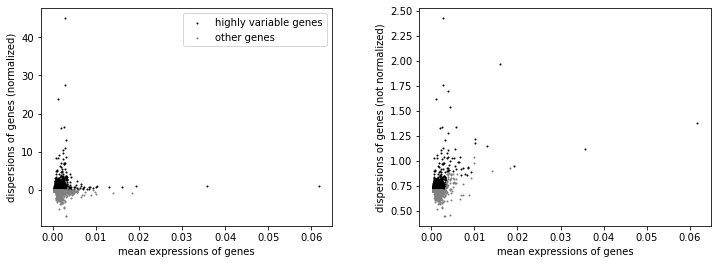

In [11]:
# Find Variable genes
sc.pp.highly_variable_genes(mean_raw, n_top_genes = 2000)
sc.pl.highly_variable_genes(mean_raw)

In [12]:
variable_only = mean_raw[:,  mean_raw.var["highly_variable"]]

/home/briando/data/software/miniconda3/envs/scrnaseq/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  if not is_categorical(df_full[k]):
/home/briando/data/software/miniconda3/envs/scrnaseq/lib/python3.8/site-packages/anndata/_core/anndata.py:1097: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


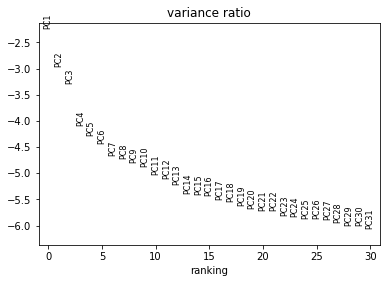

In [13]:
sc.tl.pca(variable_only, svd_solver='arpack')
sc.pl.pca_variance_ratio(variable_only, log=True)

In [14]:
# Find euclidean distance in PC Space for varying numbers of PCs
NUM_PCS = 50
cv_list = []

for num_pc in range(1, 51):
    pca_mat = variable_only.obsm["X_pca"][:, :num_pc] # genes x 50 PC matrix

    # Find median nontargetting PCA profile
    median_nontargeting = np.median(pca_mat[variable_only.obs["gene"] == "non-targeting", :], axis = 0)
    # Find the distance 
    distances = np.linalg.norm((pca_mat - median_nontargeting),  axis = 1)
    # Calcultate the CV of the nontargeting distances.  A small CV will be ideal
    cv_list.append(distances[variable_only.obs["gene"] == "non-targeting"].std() / \
      distances[variable_only.obs["gene"] == "non-targeting"].mean())

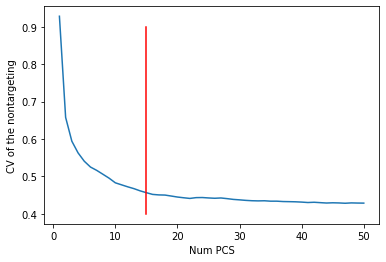

In [15]:
# Plot an identify the the smallest number of PCs where CV stops decreasing
plt.plot([i for i in range(1, 51)], cv_list)
plt.xlabel("Num PCS")
plt.ylabel("CV of the nontargeting")
plt.plot([15, 15], [.4, .9], "r")

In [16]:
best_num_pc = 15
pca_mat = variable_only.obsm["X_pca"][:, :best_num_pc] # genes x 50 PC matrix

# Find median nontargetting PCA profile
median_nontargeting = np.median(pca_mat[variable_only.obs["gene"] == "non-targeting", :], axis = 0)
# Find the distance 
distances = np.linalg.norm((pca_mat - median_nontargeting) , axis = 1) 

In [17]:
mean_nontgt = distances[variable_only.obs["gene"] == "non-targeting"].mean()
print(mean_nontgt,"mean non-targeting")
std_nontgt = distances[variable_only.obs["gene"] == "non-targeting"].std()
print(std_nontgt, "std non-targeting")

0.56723535 mean non-targeting
0.25903177 std non-targeting


In [18]:
variable_only.obs["Distance"] = distances

/home/briando/data/software/miniconda3/envs/scrnaseq/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/briando/data/software/miniconda3/envs/scrnaseq/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


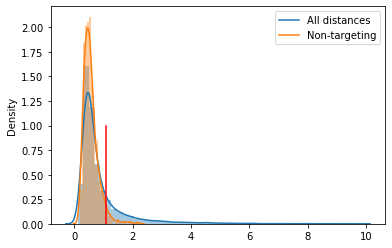

In [19]:
# Set a cutoff for variable cells at 2 standard deviations above the mean non-targeting distance
CUTOFF = mean_nontgt + 2*std_nontgt
sns.distplot(distances)
sns.distplot(distances[variable_only.obs["gene"] == "non-targeting"])
plt.legend(["All distances", "Non-targeting"])
plt.plot([CUTOFF, CUTOFF], [0, 1], "r")

# Redo the PCA with the subset of genes that are 
    a) nontargetting 
    b) very different in the PC space calculation

In [20]:
variable_guides = variable_only[(distances > CUTOFF) | (variable_only.obs["gene"] == "non-targeting"), :]
variable_guides

/home/briando/data/software/miniconda3/envs/scrnaseq/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  if not is_categorical(df_full[k]):
/home/briando/data/software/miniconda3/envs/scrnaseq/lib/python3.8/site-packages/anndata/_core/anndata.py:1097: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


View of AnnData object with n_obs × n_vars = 2811 × 2000
    obs: 'UMI_count_unfiltered', 'num_cells_unfiltered', 'num_cells_filtered', 'control_expr', 'fold_expr', 'pct_expr', 'core_control', 'mean_leverage_score', 'std_leverage_score', 'energy_test_p_value', 'anderson_darling_counts', 'mann_whitney_counts', 'z_gemgroup_UMI', 'mitopercent', 'TE_ratio', 'cnv_score_z', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gene', 'Distance'
    var: 'gene_name', 'mean', 'std', 'cv', 'in_matrix', 'gini', 'clean_mean', 'clean_std', 'clean_cv', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

/home/briando/data/software/miniconda3/envs/scrnaseq/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'gene' as categorical


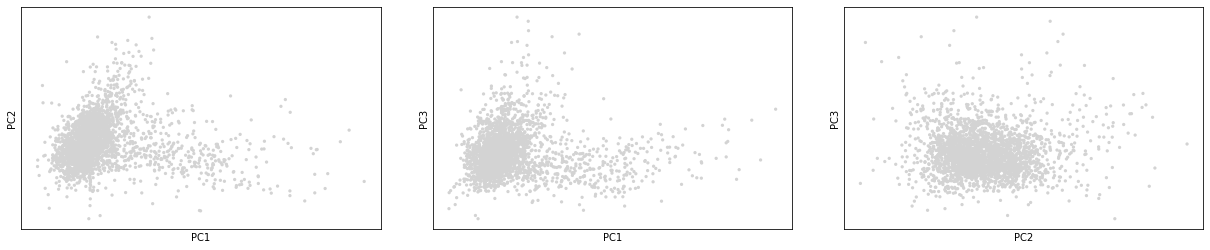

<Figure size 432x288 with 0 Axes>

In [21]:
sc.tl.pca(variable_guides, svd_solver='arpack')
sc.pl.pca(variable_guides, components = ['1,2', '1,3', '2,3'])
plt.tight_layout()

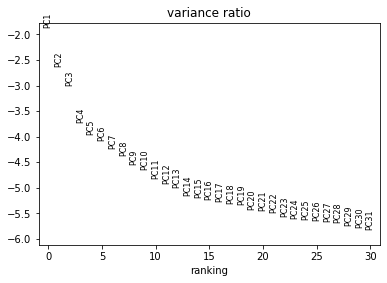

In [22]:
sc.pl.pca_variance_ratio(variable_guides, log=True)

In [23]:
rep_stress_genes = ['ADSL','ADSS1','ADSS2','AICDA','ALYREF','ATAD5','ATIC','ATR',
                    'ATRX','BAZ1A','BCL6','BLM','BOD1L1','BRCA2','CAD','CCNE1',
                    'CCNE2','CDA','CDC34','CDC45','CDC6','CDC7','CDK2','CDK2AP1',
                    'CDK9','CDT1','CENPS','CENPX','CHTF18','CHTF8','CIZ1','CMPK1',
                    'CMPK2','CNOT6','CORT','CSDE1','CTPS1','CTPS2','DACH1','DBF4',
                    'DBF4B','DCK','DCTD','DCTPP1','DDX11','DDX21','DDX23','DHODH',
                    'DNA2','DNAJA3','DONSON','DPYD','DPYS','DRD2','DRD3','DRD4',
                    'DSCC1','DTYMK','DUT','E2F7','E2F8','EME1','EME2','ENDOG','ENPP1',
                    'ENPP3','ENTPD1','ENTPD3','ETAA1','EXD2','FAM111A','FANCM','FBH1',
                    'FBXO5','FEN1','GART','GEN1','GINS1','GINS2','GINS3','GINS4','GMNC',
                    'GMNN','GMPS','HELB','HMGA1','IMPDH1','IMPDH2','INO80','KAT7',
                    'KHDC3L','LHPP','LIG1','LIG3','LRWD1','MCIDAS','MCM10','MCM2',
                    'MCM3','MCM4','MCM5','MCM6','MCM7','MCM9','MCMBP','METTL4',
                    'MGME1','MMS22L','MRE11','MUS81','NBN','NME1','NME1-NME2','NME2',
                    'NME3','NME4','NME6','NME7','NOC3L','NT5C','NT5M','NUCKS1','NUGGC',
                    'OOEP','ORC1','ORC2','ORC3','ORC4','ORC5','ORC6','PAICS','PCNA',
                    'PFAS','PNKP','POLA1','POLA2','POLB','POLD1','POLD2','POLD3','POLD4',
                    'POLE','POLE2','POLE3','POLE4','POLG','POLG2','POLN','POLQ','PPAT',
                    'PRIM1','PRIM2','PRIMPOL','PURA','RAD51','RECQL','RECQL4','RECQL5',
                    'REV3L','RFC1','RFC2','RFC3','RFC4','RFC5','RFWD3','RPA1','RPA4',
                    'RPAIN','RRM1','RRM2','RRM2B','RTEL1','RTF2','SAMHD1','SENP2','SETMAR',
                    'SIRT7','SLFN11','SMARCAL1','SRPK2','SSBP1','STOML2','THOC1','TICRR',
                    'TIMELESS','TIPIN','TK1','TK2','TONSL','TOPBP1','TRAIP','TWNK','TYMP',
                    'TYMS','UCK1','UCK2','UCKL1','UMPS','UPB1','UPF1','UPP1','UPRT',
                    'URS0000338542_9606','WDHD1','WDR18','WIZ','WRN','WRNIP1','ZGRF1',
                    'ZMPSTE24','ZNF830','ZPR1','ZRANB3']

In [24]:
# Add an attribute for non-targeting (to make it easier to plot)
variable_guides.obs["Non-targetting"] = (variable_guides.obs["gene"] == "non-targeting").map({True: "non-targeting",
                                                                                          False:"targeting"})


In [26]:
variable_guides.obs["replication"] = (variable_guides.obs["gene"].isin(rep_stress_genes)).map({True: "replication",
                                                                                          False:"non-replication"})

In [25]:
# Find the UMAP
sc.pp.neighbors(variable_guides, n_neighbors=10, n_pcs=50)
sc.tl.umap(variable_guides)

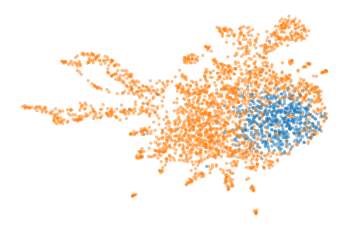

In [73]:
sc.pl.umap(variable_guides, color="Non-targetting", 
           title="", 
           legend_loc = 'none', alpha=0.5, frameon=False,
           save="220518_umap.pdf")

<Figure size 144x144 with 0 Axes>

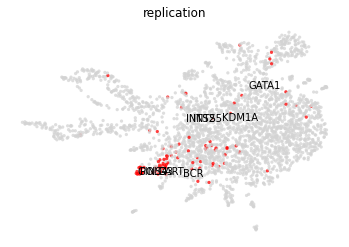

In [75]:
genes_to_label = ["GART", "GATA1", "GINS4", "INTS2", "INTS5", "KDM1A", "POLD3", "BCR"]
xy = variable_guides.obsm["X_umap"][variable_guides.obs["gene"].isin(genes_to_label)]

TEXTS = []
for i in range(len(genes_to_label)):
    text = NAMES[i]
    TEXTS.append(ax.text(xy[i,0], xy[i,1], genes_to_label[i]))






plt.figure(figsize=[2,2])
fig = sc.pl.umap(variable_guides, color="replication", frameon=False,
           legend_loc = 'none', alpha=0.75, palette=["lightgrey", "red"], return_fig=True)

adjust_text(
    TEXTS, 
    expand_points=(2, 2),
    arrowprops=dict(
        arrowstyle="->", 
        color=GREY50, 
        lw=2
    ),
    ax=fig.axes[0]
)
fig

In [100]:
df = variable_guides.obs[["gene", "Non-targetting", "replication"]]
df["umap1"] = variable_guides.obsm["X_umap"][:,0]
df["umap2"] = variable_guides.obsm["X_umap"][:,1]
for gene in ["HBZ", "SLC25A37", "SPI1", "CSF3R"]:
    ensg = variable_guides.var[variable_guides.var["gene_name"] == gene].index[0]
    df[gene] = sc.get.obs_df(variable_guides, keys=[ensg])
df

<ipython-input-100-a4826b74387b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["umap1"] = variable_guides.obsm["X_umap"][:,0]
<ipython-input-100-a4826b74387b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["umap2"] = variable_guides.obsm["X_umap"][:,1]
<ipython-input-100-a4826b74387b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,gene,Non-targetting,replication,umap1,umap2,HBZ,SLC25A37,SPI1,CSF3R
gene_transcript,,,,,,,,,
10005_ZBTB4_P1_ENSG00000174282,ZBTB4,targeting,non-replication,5.330689,-4.808454,0.736582,0.338176,0.032896,-0.037528
10006_ZBTB5_P1P2_ENSG00000168795,ZBTB5,targeting,non-replication,2.407954,3.550945,-0.180592,0.030996,0.005312,0.032959
10015_ZBTB8OS_P1P2_ENSG00000176261,ZBTB8OS,targeting,non-replication,6.815211,3.690921,-0.447749,-0.046618,0.077160,0.002015
10016_ZBTB9_P1P2_ENSG00000213588,ZBTB9,targeting,non-replication,3.890960,-3.447708,0.287317,0.211498,0.010327,-0.021286
1001_C17orf49_P1_ENSG00000258315,C17orf49,targeting,non-replication,3.542057,2.255487,0.713241,0.396150,-0.033732,-0.036935
...,...,...,...,...,...,...,...,...,...
996_C16orf72_P2_ENSG00000182831,C16orf72,targeting,non-replication,6.969984,0.170681,-0.001487,0.095938,-0.057383,-0.026490
9971_ZBTB14_P1P2_ENSG00000198081,ZBTB14,targeting,non-replication,-1.375890,2.381287,0.839363,0.319606,-0.071620,-0.074976
9972_ZBTB16_P1P2_ENSG00000109906,ZBTB16,targeting,non-replication,3.195396,-2.692110,1.040547,0.264955,-0.077291,-0.007829


In [108]:
df.to_csv("data/220723_perturb_output.csv")

In [377]:
variable_guides

AnnData object with n_obs × n_vars = 2811 × 2000
    obs: 'UMI_count_unfiltered', 'num_cells_unfiltered', 'num_cells_filtered', 'control_expr', 'fold_expr', 'pct_expr', 'core_control', 'mean_leverage_score', 'std_leverage_score', 'energy_test_p_value', 'anderson_darling_counts', 'mann_whitney_counts', 'z_gemgroup_UMI', 'mitopercent', 'TE_ratio', 'cnv_score_z', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gene', 'Distance', 'Non-targetting', 'leiden'
    var: 'gene_name', 'mean', 'std', 'cv', 'in_matrix', 'gini', 'clean_mean', 'clean_std', 'clean_cv', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'Non-targetting_colors', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

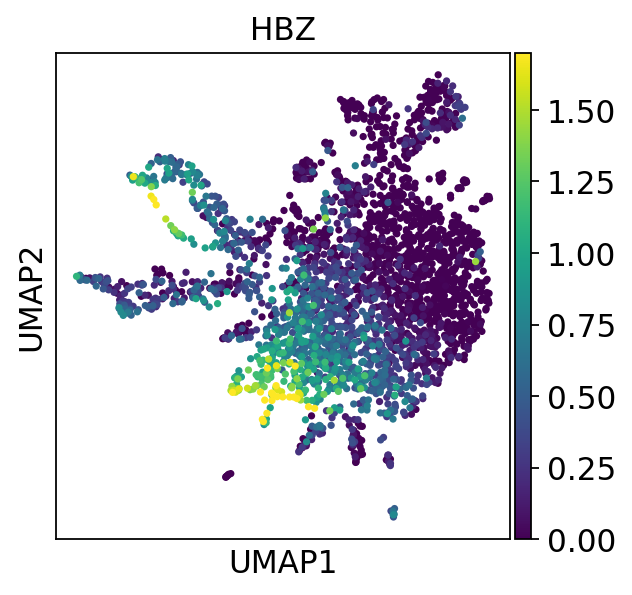

In [365]:
g = "HBZ"
g in np.array(variable_guides.var["gene_name"])
x = variable_guides.var[variable_guides.var["gene_name"] == g]
sc.pl.umap(variable_guides, color=x.index[0], vmax=1.7, vmin=0, title="HBZ",
           save="hbz.pdf")

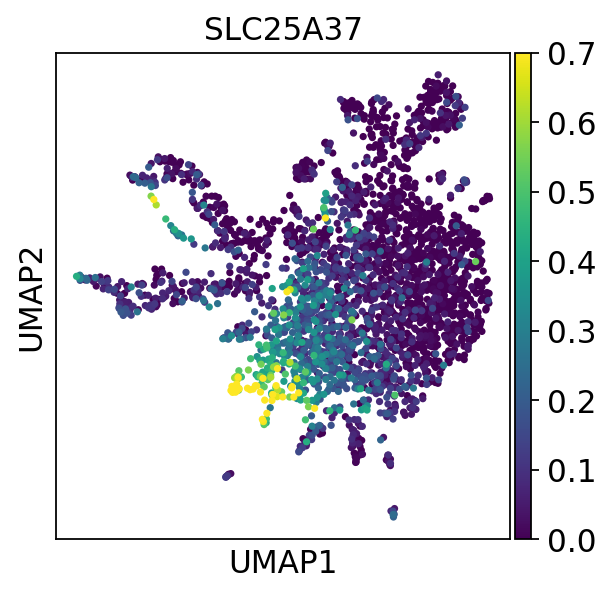

In [364]:
g = "SLC25A37"
g in np.array(variable_guides.var["gene_name"])
x = variable_guides.var[variable_guides.var["gene_name"] == g]
sc.pl.umap(variable_guides, color=x.index[0], vmax=0.7, vmin=0,
           title="SLC25A37", save="slc25a37.pdf")

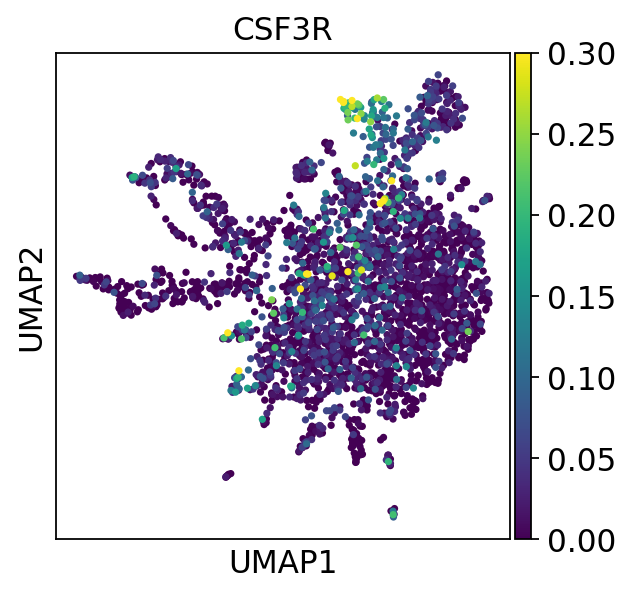

In [362]:
g = "CSF3R"
g in np.array(variable_guides.var["gene_name"])
x = variable_guides.var[variable_guides.var["gene_name"] == g]
sc.set_figure_params(figsize=(4,4))
sc.pl.umap(variable_guides, color=x.index[0], title="CSF3R", vmax=0.3, vmin=0,
           save="csf3r.pdf")

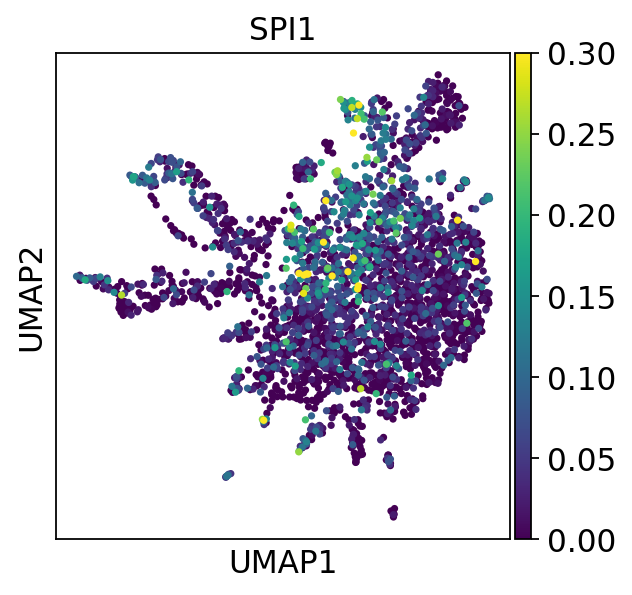

In [363]:
g = "SPI1"
g in np.array(variable_guides.var["gene_name"])
x = variable_guides.var[variable_guides.var["gene_name"] == g]
sc.pl.umap(variable_guides, color=x.index[0], title="SPI1", 
           vmax=0.3, vmin=0,
           save="spi1.pdf")

#  Look for guides that cause differentiation

From Weissman Lab Paper
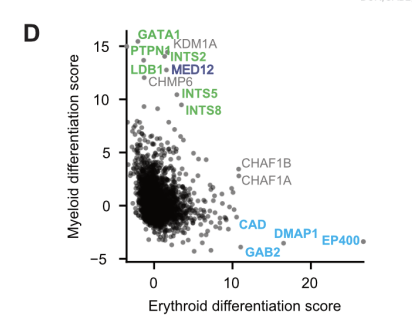

In [290]:
g = "CEBPA"
print(g in list(mean_raw.var["gene_name"]))
print(g in list(variable_guides.var["gene_name"]))

False
False


In [281]:
# Granulocyte and Erythrocyte genes from the Weissman lab
granulocyte_score={'CSF3R':'ENSG00000119535',
                   'LST1':'ENSG00000204482',
                   'CD33':'ENSG00000105383',
                   'LYZ': 'ENSG00000090382',
                   'AIF1': 'ENSG00000204472',
                   'CD55':'ENSG00000196352',
                   'SPI1': 'ENSG00000066336',

#                   'ITGAM':'ENSG00000169896',
#                   'ITGAL':'ENSG00000005844',
#                   'ITGAX':'ENSG00000140678',
#                   'FCGR1B':'ENSG00000198019',
#                   'PTPRC':'ENSG00000081237',
#                   'FCGR1A':'ENSG00000150337',
#                   'ANPEP':'ENSG00000166825',
#                   'CD24':'ENSG00000272398'
                  }

erythrocyte_score={'HBG1':'ENSG00000213934',
                   'GYPA':'ENSG00000170180',
                   'ERMAP':'ENSG00000164010',
                   'ALAS2':'ENSG00000158578',
                   'HBA1':'ENSG00000206172',
                   'KLF1':'ENSG00000105610',
                   'SLC25A37':'ENSG00000147454'
#                   'HBG2':'ENSG00000196565',
#                   'HBZ':'ENSG00000130656',
#                   'GYPB':'ENSG00000250361',
#                   'GYPC':'ENSG00000136732',
#                   'HBA2':'ENSG00000188536',
#                   'HBB':'ENSG00000244734',
                  }

In [291]:
guide_erythrocyte_differentiation = mean_norm_df[erythrocyte_score.keys()].mean(axis=1)
guide_granulocyte_differentiation = mean_norm_df[granulocyte_score.keys()].mean(axis=1)

mean_raw.obs["Erythrocyte Score"] = guide_erythrocyte_differentiation
mean_raw.obs["Granulocyte Score"] = guide_granulocyte_differentiation

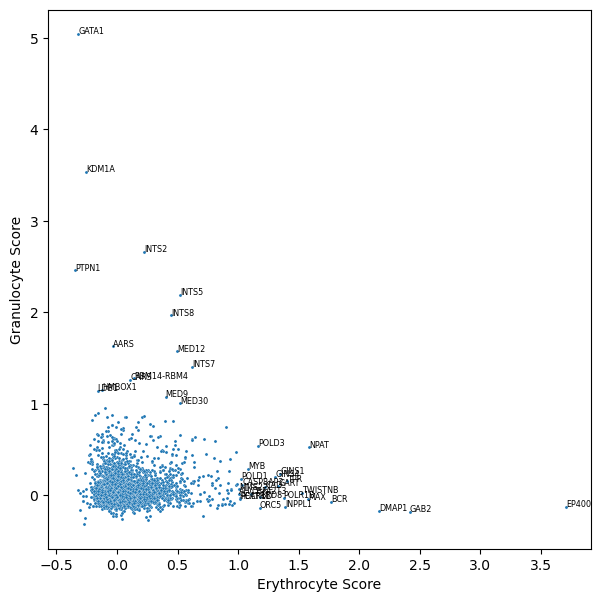

In [293]:
# Scatterplot of score in the pseudobulk sense
g, d, c = init_grid((1,1), (7,7))
plt.subplot(*g, next(c))

sns.scatterplot(data = mean_raw.obs, x = "Erythrocyte Score", y = "Granulocyte Score", s = 5)

for i in mean_raw.obs[mean_raw.obs["Granulocyte Score"] > 1].index:
    plt.text(mean_raw.obs.loc[i, "Erythrocyte Score"], mean_raw.obs.loc[i, "Granulocyte Score"], 
             mean_raw.obs.loc[i, "gene"], size = "xx-small")
for i in mean_raw.obs[mean_raw.obs["Erythrocyte Score"] > 1].index:
    plt.text(mean_raw.obs.loc[i, "Erythrocyte Score"], mean_raw.obs.loc[i, "Granulocyte Score"], 
             mean_raw.obs.loc[i, "gene"], size = "xx-small")


In [286]:
z = mean_norm_df[erythrocyte_score.keys()]
zz = mean_norm_df[granulocyte_score.keys()]
g = "POLD3"
print(z.loc[mean_raw.obs[mean_raw.obs["gene"] == g].index[0]])
print(zz.loc[mean_raw.obs[mean_raw.obs["gene"] == g].index[0]])

HBG1        1.388697
GYPA        0.425119
ERMAP       0.463990
ALAS2       1.699669
HBA1        1.128120
KLF1        0.740021
SLC25A37    2.291420
Name: 6517_POLD3_P1P2_ENSG00000077514, dtype: float32
CSF3R    1.020954
LST1     0.679925
CD33    -0.004069
LYZ      1.100681
AIF1     0.601540
CD55     0.121815
SPI1     0.288593
Name: 6517_POLD3_P1P2_ENSG00000077514, dtype: float32


In [298]:
mean_raw.obs.to_csv("220517_recalc_diff_scores.csv")